In [41]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns

df = pd.read_csv("../Final_Data_Collection/Diabetes_Data_1999_2008.csv")
discharge_map = pd.read_csv("../Final_Data_Collection/Discharge_Disposition_Mapping.csv")
admission_type = pd.read_csv("../Final_Data_Collection/Admission_Type_Mapping.csv")

In [42]:
df = df.merge(discharge_map, how='left', on='discharge_disposition_id')
df.rename(columns={'description': 'discharge_disposition_description'}, inplace=True)
df = df.merge(admission_type, how='left', on='admission_type_id')
df.rename(columns={'description': 'admission_type_description'}, inplace=True)


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,discharge_disposition_description,admission_type_description
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,Not Mapped,NaN
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30,Discharged to home,Emergency
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,Discharged to home,Emergency
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,Discharged to home,Emergency
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,Discharged to home,Emergency


In [43]:
import random
%matplotlib inline

# changing the default figure sizes
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

import random # random library
pallete = ['Accent_r', 'Blues', 'BrBG', 'BrBG_r', 'BuPu', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'OrRd', 'Oranges', 'Paired', 'PuBu', 'PuBuGn', 'PuRd', 'Purples', 'RdGy_r', 'RdPu', 'Reds', 'autumn', 'cool', 'coolwarm', 'flag', 'flare', 'gist_rainbow', 'hot', 'magma', 'mako', 'plasma', 'prism', 'rainbow', 'rocket', 'seismic', 'spring', 'summer', 'terrain', 'turbo', 'twilight']

In [ ]:

sns.countplot(x="diabetesMed", hue = "readmitted", data=df, palette=random.choice(pallete))

In [ ]:
sns.countplot(x="insulin", hue = "readmitted", data=df, palette=random.choice(pallete))

In [45]:
pd.set_option('display.max_columns', None)
print(f"Total Rows: {len(df)}")
df["race"].replace(to_replace='?',value=df["race"].mode()[0], inplace=True)
df.drop(columns=['weight', 'payer_code', 'medical_specialty'], inplace=True)
df.drop(columns=['metformin-pioglitazone', 'metformin-rosiglitazone', 'glimepiride-pioglitazone', 'glipizide-metformin', 'citoglipton', 'examide', 'tolazamide', 'troglitazone', 'miglitol', 'tolbutamide', 'acetohexamide', 'chlorpropamide'], inplace=True)
df = df[df.diag_1.isin(['?']) == False]
df = df[df.diag_2.isin(['?']) == False]
df = df[df.diag_3.isin(['?']) == False]
df = df[df.gender.isin(['Unknown/Invalid']) == False]
df["gender"].replace(to_replace='Unknown/Invalid',value=df["gender"].mode()[0], inplace=True)
print(f"Total Rows: {len(df)}")

Total Rows: 101766
Total Rows: 100244


In [52]:
fields = [0,1,2,3,4,5]
def generate_outcome_variable(row):
    if row['discharge_disposition_id'] == 1:
        if row['readmitted'] == 'NO':
            entry = 0
        elif row['readmitted'] == '>30':
            entry = 1
        else:
            entry = 2
    else:
        if row['readmitted'] == 'NO':
            entry = 3
        elif row['readmitted'] == '>30':
            entry = 4
        else:
            entry = 5

    return entry

df['output'] = df.apply(generate_outcome_variable, axis=1)
df.head()

#sns.pairplot(df, hue='readmitted',palette=random.choice(pallete))

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,acarbose,insulin,glyburide-metformin,change,diabetesMed,readmitted,discharge_disposition_description,admission_type_description,output
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,Up,No,Ch,Yes,>30,Discharged to home,Emergency,1
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,Steady,No,No,No,No,No,No,No,Yes,NO,Discharged to home,Emergency,0
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,Up,No,Ch,Yes,NO,Discharged to home,Emergency,0
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,Steady,No,No,No,No,Steady,No,Ch,Yes,NO,Discharged to home,Emergency,0
5,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,31,6,16,0,0,0,414,411,250,9,None,None,No,No,No,No,No,No,No,No,No,Steady,No,No,Yes,>30,Discharged to home,Urgent,1


In [54]:
df.to_csv("../Final_Data_Collection/cleaned_data.csv", index=False)


3


<AxesSubplot:xlabel='race', ylabel='count'>

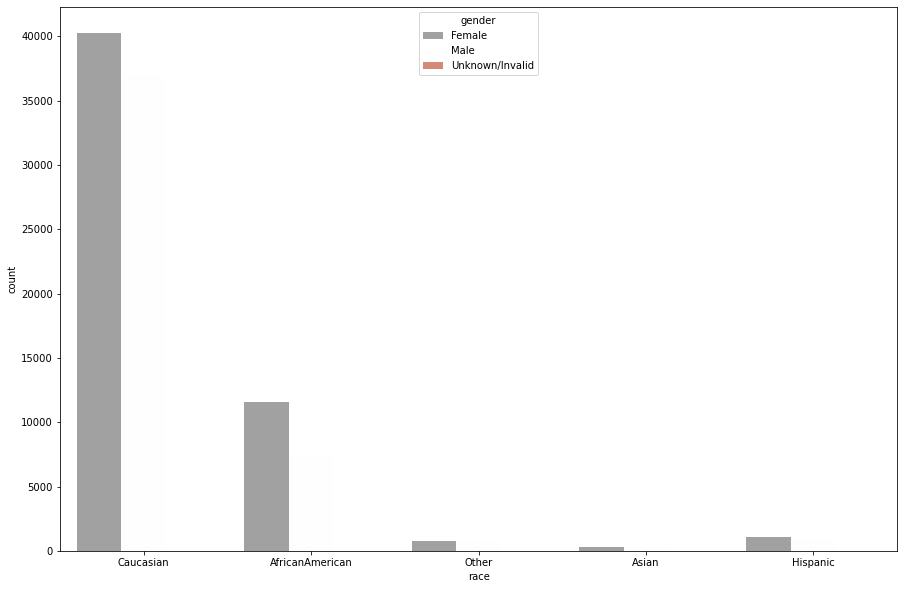

In [57]:
sns.countplot(x="race", hue = "gender", data=df, palette=random.choice(pallete))


In [58]:
df.isin(['Unknown/Invalid']).sum()

encounter_id                         0
patient_nbr                          0
race                                 0
gender                               3
age                                  0
admission_type_id                    0
discharge_disposition_id             0
admission_source_id                  0
time_in_hospital                     0
num_lab_procedures                   0
num_procedures                       0
num_medications                      0
number_outpatient                    0
number_emergency                     0
number_inpatient                     0
diag_1                               0
diag_2                               0
diag_3                               0
number_diagnoses                     0
max_glu_serum                        0
A1Cresult                            0
metformin                            0
repaglinide                          0
nateglinide                          0
glimepiride                          0
glipizide                